# Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.shape

(1059, 8)

In [ ]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

There are no null values in the dataset

In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

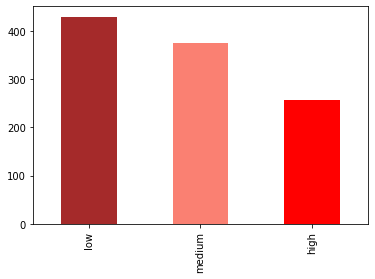

In [ ]:
df.Grade.value_counts().plot(kind="bar", color=["brown", "salmon", "red"])
plt.show()

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])
  
df['Grade'].unique()

array([0, 1, 2])

In [ ]:
features = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
X = df.loc[:, features]
y = df.loc[:, ['Grade']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)

(741, 7)


In [ ]:
y_test.shape

(318, 1)

In [ ]:
print(X_test)

      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
576  6.6          40      1     0     1          1     255
312  4.5          60      0     1     1          1     250
70   9.0          43      1     0     1          1     250
682  6.8          45      0     0     0          1     255
896  6.6          38      0     0     0          0     255
..   ...         ...    ...   ...   ...        ...     ...
752  6.5          36      0     0     0          0     247
568  6.8          34      0     0     0          1     240
377  6.8          45      0     0     0          1     255
644  6.5          50      1     0     1          0     246
344  6.7          38      1     0     1          0     255

[318 rows x 7 columns]


In [ ]:
print(y_test)

     Grade
576      0
312      1
70       1
682      2
896      2
..     ...
752      2
568      2
377      2
644      1
344      0

[318 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Normalization

# Algorithm - Naive Bayes Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.9748427672955975


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
accuracy = dtree_model.score(X_test, y_test)
# creating a confusion matrix
print(accuracy)
cm = confusion_matrix(y_test, dtree_predictions)

0.6729559748427673


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_prediction = gnb.predict(X_test)
print(y_prediction)

[0 1 1 1 2 1 1 0 1 2 1 2 0 2 1 1 0 2 2 2 1 2 0 2 2 2 1 0 0 1 2 0 0 2 0 2 2
 0 2 2 1 1 1 2 0 1 2 0 2 0 2 1 1 2 2 1 0 1 1 2 2 1 0 0 0 1 2 1 1 2 1 1 0 2
 1 1 1 2 1 1 2 2 0 0 2 2 0 1 2 0 1 1 0 2 1 1 0 0 0 2 1 1 1 1 2 2 1 1 2 0 0
 2 2 1 0 0 2 1 0 0 2 1 1 1 2 0 2 2 0 2 1 2 1 2 1 1 2 1 2 2 2 0 1 2 1 1 0 1
 1 2 2 2 2 1 2 1 1 0 1 0 2 2 2 1 2 0 1 1 2 1 0 2 1 1 2 1 2 2 2 2 1 2 0 1 0
 1 2 0 2 1 1 2 0 1 0 1 1 0 2 2 0 2 0 0 2 1 2 0 2 2 0 0 2 2 0 1 1 0 2 1 2 2
 2 2 1 2 1 1 2 0 2 1 2 1 2 1 2 2 2 1 1 0 0 1 1 2 1 2 1 1 0 0 2 0 2 2 1 2 1
 1 2 0 0 0 2 1 0 2 2 2 2 2 1 2 2 1 1 1 2 0 2 0 1 2 1 1 1 2 0 2 1 1 2 0 2 1
 0 0 2 1 2 1 0 2 1 1 1 0 2 2 2 2 2 2 2 1 2 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.9025157232704403


In [ ]:
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]


It is hard to understand the confusion matrix when it is in this format

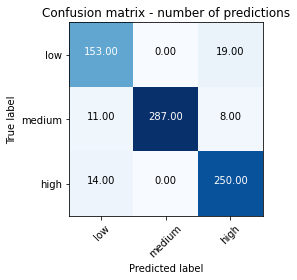

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
cmap=plt.cm.Blues
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
labels = ['low', 'medium', 'high']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

The confusion matrix shows that 'low' was predicted correctly 153 times, 'medium' was predicted correctly 287 times and 'high' was predicted correctly 250 times.